# Анализ рынка заведений общественного питания Москвы

# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# Содержание

1. [Загрузка данных и подготовка их к анализу](#step1_0)


2. [Анализ данных](#step2_0)

    2.1 [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#step2_1)
    
    2.2 [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#step2_2)
    
    2.3 [Для какого вида объекта общественного питания характерно сетевое распространение?](#step2_3)
    
    2.4 [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step2_4)
    
    2.5 [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#step2_5)
    
    2.6 [Выделите в отдельный столбец информацию об улице из столбца address .](#step2_6)
    
    2.7 [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step2_7)
    
    2.8 [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step2_8)
    
    2.9 [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step2_9)
    
    2.10 [Общий вывод](#step2_10)
    
    
3. [Презентация.](#step3)
    

# Описание данных

Таблица `rest_data` содержит следующие столбцы:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

# 1. Загурзка данных и подготовка их к анализу. <a id="step1_0"></a>

In [3]:
# импрортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/datasets/rest_data.csv')

In [5]:
print(df.info(), '\n\n')
df.head()
# пропуски отсутвуют, и тип данных каждого столбца тоже в порядке

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None 




,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
# приведем к нижнему регистру столбец object_name, что бы не попадались одинаковые названия с разным регистром
df['object_name'] = df['object_name'].str.lower()

In [5]:
# дубликаты присутствуют, 
df.duplicated(['object_name','chain','object_type','address','number']).sum()

85

Имеются заведения с разным id, но с одинаковой информацией по остальным столбцам. Я считаю что их стоит оставить, так как скорее всего может быть одно и тоже заведение в одном здании, такое часто бывает например в торговых ценрах: два заведения в разных частях центра. Либо столовые в бизнес центрах или учебных заведениях.

# 2. Анализ данных<a id="step2_0"></a>

# 2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.<a id="step2_1"></a>

In [6]:
obj_type = df.groupby(['object_type'], as_index=False).agg({'id':'count'})
obj_type.columns = ['object_type', 'count']

In [7]:
obj_type = obj_type.sort_values(by='count', ascending=False)

In [8]:
obj_type

,object_type,count
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


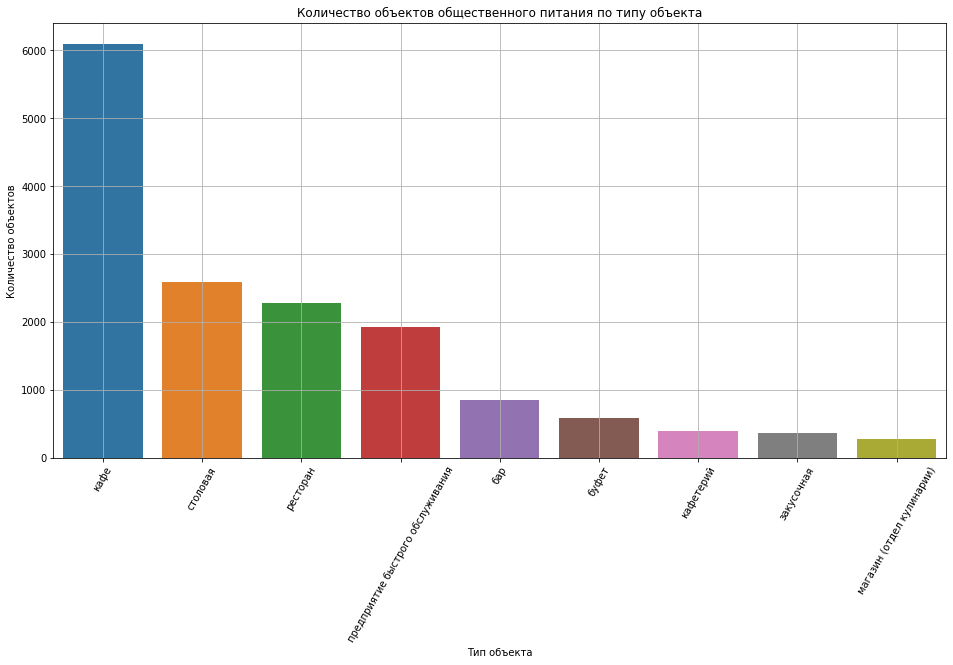

In [9]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x = 'object_type', y ='count' ,data = obj_type)
ax.set(title='Количество объектов общественного питания по типу объекта', xlabel='Тип объекта', ylabel='Количество объектов')
plt.grid()
plt.xticks(rotation=60);

Подавляющее кол-во заведегний это кафе, а меньше всего кафетериев, закусочных и отделов кулинарии в магазинах.

# 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.<a id="step2_2"></a>

In [10]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})

In [11]:
df_chain = df.groupby(['chain'], as_index=False).agg({'id':'count'})
df_chain.columns = ['chain', 'count']
df_chain

,chain,count
0,несетевое,12398
1,сетевое,2968


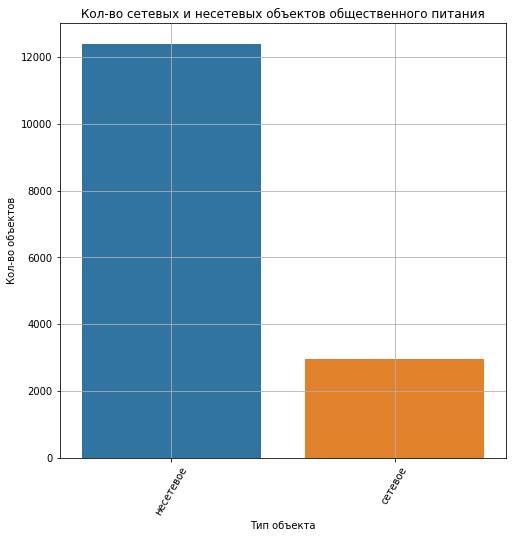

In [12]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x = 'chain', y ='count' ,data = df_chain)
ax.set(title='Кол-во сетевых и несетевых объектов общественного питания', xlabel='Тип объекта', ylabel='Кол-во объектов')
plt.grid()
plt.xticks(rotation=60);

Тут, как мы видим, несетевых заведений в Москве в несколько раз больше, чем сетевых.

# 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?<a id="step2_3"></a>

In [13]:
chain = df.query('chain == "сетевое"').groupby(['object_type'],as_index=False).agg({'id':'count'})
chain

,object_type,id
0,бар,37
1,буфет,11
2,закусочная,56
3,кафе,1396
4,кафетерий,52
5,магазин (отдел кулинарии),78
6,предприятие быстрого обслуживания,791
7,ресторан,544
8,столовая,3


In [14]:
chain_all = df.groupby(['object_type'],as_index=False).agg({'id':'count'})

In [15]:
chain = chain.merge(chain_all, left_on='object_type', right_on='object_type')

In [16]:
chain['ratio'] = chain['id_x'] / chain['id_y']
chain.sort_values(by='ratio',ascending=False)

,object_type,id_x,id_y,ratio
6,предприятие быстрого обслуживания,791,1923,0.411336
5,магазин (отдел кулинарии),78,273,0.285714
7,ресторан,544,2285,0.238074
3,кафе,1396,6099,0.228890
2,закусочная,56,360,0.155556
4,кафетерий,52,398,0.130653
0,бар,37,856,0.043224
1,буфет,11,585,0.018803
8,столовая,3,2587,0.001160


Выходит, что сетевое распространение больше всего характерно для предприятий быстрого обслуживания - 41.1%. На втором месте отделы кулинарии в магазинах - 28.6%. И это воплне логично: фаст-фуд есть почти на каждом углу, и все их знают(макдональдс, кфс и т.д), так же и с супермаркетами(перекресток, виктория и т.д).

# 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a id="step2_4"></a>

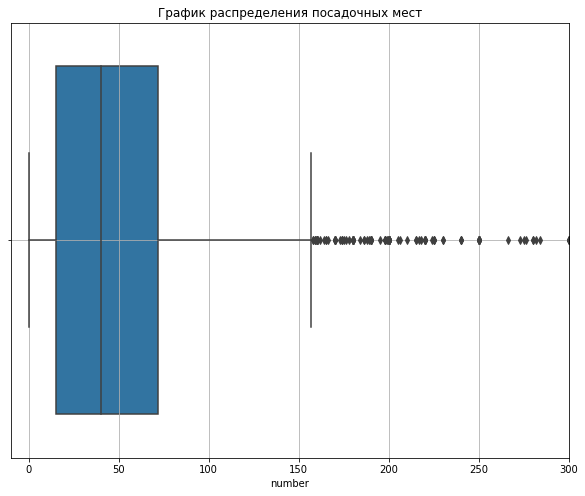

In [17]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x=df.query('chain == "сетевое"')['number'])
plt.grid()
plt.xlim(-10, 300);
ax.set(title='График распределения посадочных мест');

Из данного графика мы видим, что посадочных мест в основном мало, а большое количество - это выбросы.

Посмотрим еще один график.

In [18]:
chain = df.query('chain == "сетевое"').groupby(['object_name'], as_index=False).agg({'id':'count', 'number':'median'})

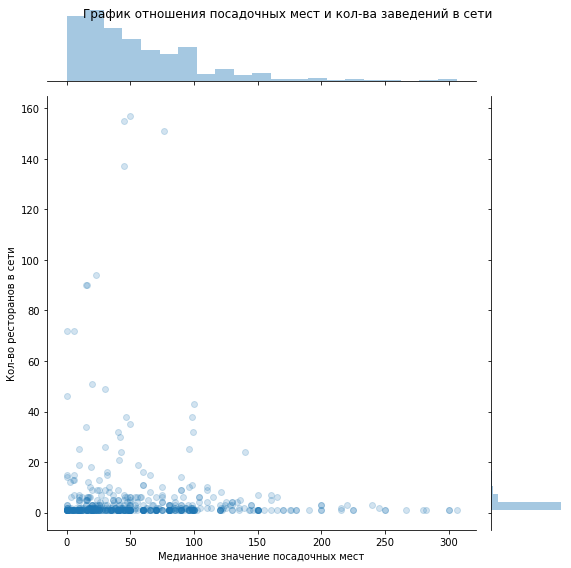

In [19]:
ax = sns.jointplot(x='number', y='id', data=chain, kind='scatter', alpha=0.2, height=8)
ax.set_axis_labels('Медианное значение посадочных мест', 'Кол-во ресторанов в сети')
plt.suptitle('График отношения посадочных мест и кол-ва заведений в сети');

In [20]:
df.query('number == 0').sample(10)

,id,object_name,chain,object_type,address,number
13820,207008,шаурма,несетевое,закусочная,"город Москва, Алтайская улица, дом 19, строени...",0
13427,197153,кофе с собой,сетевое,кафетерий,"город Москва, улица Зои и Александра Космодемь...",0
290,144091,кофе с собой,сетевое,предприятие быстрого обслуживания,"город Москва, 1-я Тверская-Ямская улица, дом 1...",0
10023,171877,фудмаркет. орлов в.а.,несетевое,кафе,"город Москва, улица Новый Арбат, дом 21",0
11238,186812,шаурма,несетевое,предприятие быстрого обслуживания,"город Москва, Свободный проспект, дом 33А",0
6081,156891,чудо пекарня шаргунь,несетевое,закусочная,"город Москва, Севастопольский проспект, дом 15...",0
10275,184668,донер,несетевое,закусочная,"город Москва, Дмитровское шоссе, дом 61, корпус 1",0
12566,199196,пекарня «доноррето»,несетевое,закусочная,"город Москва, Дорожная улица, дом 40",0
10333,189133,чудо гриль,несетевое,предприятие быстрого обслуживания,"город Москва, 1-я Курьяновская улица, дом 18",0
14582,214520,кофе с собой «сладкая карамель»,несетевое,предприятие быстрого обслуживания,"город Москва, Днепропетровская улица, дом 2",0


Мы видим что много сетевых заведений с малым медианным значением посадочных мест и малым количеством ресторанов в сети в целом.

**upd:** Скорее всего сетевые заведения всего с одним адресом просто могут находиться в других городах и даже странах, от этого они не перестают быть сетевыми, их следует оставить. Нулевое же количество посадочных мест это просто заведения, работающие только на вынос или продающие упакованную готовую еду. С этим тоже все в порядке.

# 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a id="step2_5"></a>

In [21]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [22]:
# заменим длинные навазвания на более короткие для удобства вывода на графике
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

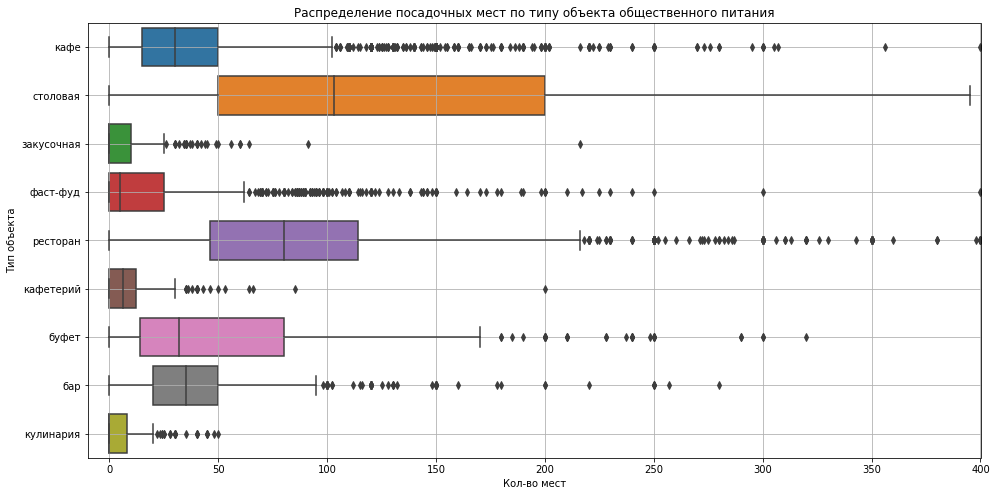

In [23]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='number', y='object_type', data = df)
ax.set(title='Распределение посадочных мест по типу объекта общественного питания', xlabel='Кол-во мест', ylabel='Тип объекта')
plt.grid()
plt.xlim(-10, 400);

In [24]:
df.groupby('object_type')['number'].mean()

object_type
бар            43.494159
буфет          51.129915
закусочная      7.608333
кафе           39.716019
кафетерий       9.123116
кулинария       5.589744
ресторан       96.834136
столовая      130.246618
фаст-фуд       20.552262
Name: number, dtype: float64

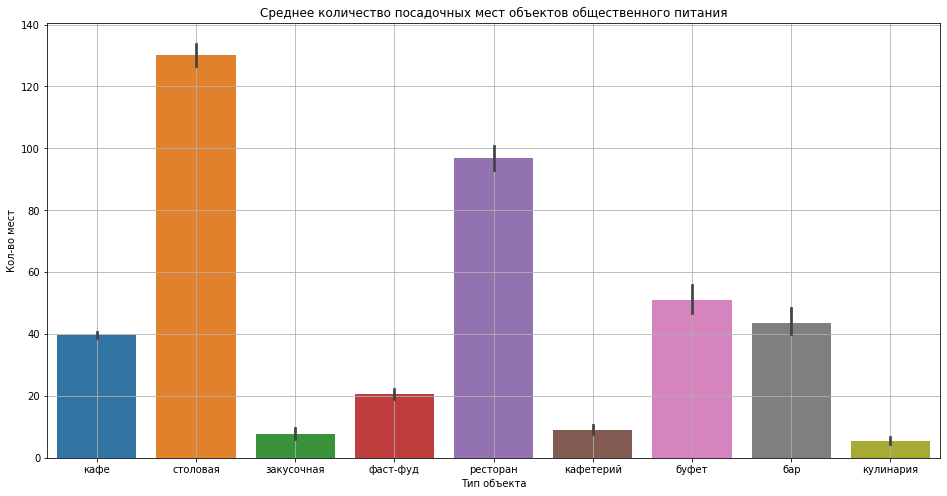

In [25]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='object_type', y='number', data = df)
ax.set(title='Среднее количество посадочных мест объектов общественного питания', xlabel='Тип объекта', ylabel='Кол-во мест')
plt.grid();

Самое большое как среднее так и медианное количество посадочных мест наблюдается у столовых а так же ресторанов.

**upd:** Для столовых такое характерно, так как они чаще всего расположены в учебных заведениях и бизнес центрах, и как мы знаем, например в школьных столовых обычно обедает вся школа, и это большой зал. Рестораны тоже обычо велики. А вот отделы кулинарии, закусочные и кафетерии, как я упоминал выше, чаще всего работают на вынос, поэтому для них характерно малое количество посадочных мест либо полное их отсутсвие.

# 2.6 Выделите в отдельный столбец информацию об улице из столбца `address`
<a id="step2_6"></a>

In [26]:
list1 = (['город Московский','поселение "Мосрентген"','поселение Московский','поселение Михайлово-Ярцевское',
        'поселение Марушкинское','город Троицк','поселение Сосенское','город Зеленоград','город Щербинка','посёлок Внуково',
         'поселение Внуковское','поселение Воскресенское','поселение Рязановское','поселение Десеновское'])
list2 = ['город Москва']

In [27]:
df['street'] = df.address.str.split(', ').apply(lambda x: x[0] if x[0] not in list2 else x[1] if x[1] not in list1 else x[2] )

In [28]:
df.sample(10)

,id,object_name,chain,object_type,address,number,street
10860,180479,столовая 16-й корпус,несетевое,столовая,"город Москва, Павловская улица, дом 25, строен...",38,Павловская улица
6896,89074,космик,сетевое,кафе,"город Москва, Сходненская улица, дом 56",80,Сходненская улица
9024,160356,лепим и варим,несетевое,кафе,"город Москва, Столешников переулок, дом 9, стр...",29,Столешников переулок
1785,141512,пицца vabenne,несетевое,кафе,"город Москва, улица Гризодубовой, дом 4, корпус 4",12,улица Гризодубовой
11797,174779,важная персона,несетевое,столовая,"город Москва, Большая Новодмитровская улица, д...",35,Большая Новодмитровская улица
11485,189879,моспаб,несетевое,кафе,"город Москва, Чертановская улица, дом 1Г",60,Чертановская улица
10591,188259,шаурма,несетевое,фаст-фуд,"город Москва, Совхозная улица, дом 41",0,Совхозная улица
11993,178279,бургер клаб,сетевое,фаст-фуд,"город Москва, Открытое шоссе, дом 9, строение 14А",16,Открытое шоссе
14449,218987,black star burger,несетевое,ресторан,"город Москва, Ленинградское шоссе, дом 16А, ст...",20,Ленинградское шоссе
12724,200752,выпечка,несетевое,закусочная,"город Москва, Старый Петровско-Разумовский про...",0,Старый Петровско-Разумовский проезд


In [29]:
df['street'].value_counts().head(10)

проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: street, dtype: int64

# 2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы? <a id="step2_7"></a>

In [30]:
# возьмем информацию из внешних источников
from io import BytesIO
import requests
spreadsheet_id = '1d4rB4IBoNLDK_ho8H0yj4Ty17Cp7u_iuWy8TANKmwIU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
distr = pd.read_csv(BytesIO(r.content))
distr

,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565
...,...,...,...,...,...,...
153,1206,поселение Новофедоровское,58703712,poselenie Novofedorovskoe,4,45298567
154,1207,поселение Первомайское,58703713,poselenie Pervomajskoe,4,45298572
155,1208,поселение Роговское,58703714,poselenie Rogovskoe,4,45298575
156,1209,поселение Троицк,58703715,poselenie Troiczk,4,45298578


In [31]:
distr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 6 columns):
Kod           158 non-null int64
Name          158 non-null object
global_id     158 non-null int64
Latin_name    158 non-null object
Type          158 non-null int64
Kod_okato     158 non-null int64
dtypes: int64(4), object(2)
memory usage: 7.5+ KB


In [32]:
spreadsheet_id = '1ghLNigMUHbJ9KD6oU1yOBaTp9vMBRrCguBeChCh_D-o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
street = pd.read_csv(BytesIO(r.content))
street.head(20)

,UM_CODE,UM_NAMEF,global_id,UM_NAMES,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR
0,8880,1-й Ирининский переулок,58481065,1-й Ирининский пер.,Pervy'j Irininskij pereulok,2,NaN,0102,77000000000706300
1,8890,2-й Ирининский переулок,58481066,2-й Ирининский пер.,Vtoroj Irininskij pereulok,2,NaN,0102,77000000000362200
2,8891,3-й Ирининский переулок,58481067,3-й Ирининский пер.,Tretij Irininskij pereulok,2,NaN,0102,77000000000362300
3,8910,Иркутская улица,58481068,Иркутская ул.,Irkutskaya ulicza,1,NaN,0406,77000000000139700
4,8920,1-й Иртышский проезд,58481069,1-й Иртышский пр.,Pervy'j Irty'shskij proezd,3,NaN,0406,77000000000331600
5,8930,2-й Иртышский проезд,58481070,2-й Иртышский пр.,Vtoroj Irty'shskij proezd,3,NaN,0406,77000000000139800
6,8935,улица Исаковского,58481071,ул. Исаковского,ulicza Isakovskogo,1,NaN,0905,77000000000139900
7,8940,улица Искры,58481072,ул. Искры,ulicza Iskry',1,NaN,0303,77000000000140000
8,8950,проезд Воскресенские Ворота,58481073,пр. Воскресенские Ворота,proezd Voskresenskie Vorota,3,NaN,0108,77000000000702300
9,8960,Истринская улица,58481074,Истринская ул.,Istrinskaya ulicza,1,NaN,0807,77000000000140200


In [33]:
street.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Data columns (total 9 columns):
UM_CODE      5278 non-null int64
UM_NAMEF     5278 non-null object
global_id    5278 non-null int64
UM_NAMES     5278 non-null object
UM_TRANS     5278 non-null object
UM_TYPE      5278 non-null int64
UM_TM        1317 non-null object
UM_TE        5278 non-null object
UM_KLADR     5086 non-null object
dtypes: int64(3), object(6)
memory usage: 371.2+ KB


Поработаем над таблицей с улицами

In [34]:
# Уберем точно лишние столбцы
street.drop(['UM_CODE','global_id','UM_NAMES','UM_TRANS','UM_TYPE','UM_TM','UM_KLADR'], axis=1, inplace=True)

In [35]:
street.head()

,UM_NAMEF,UM_TE
0,1-й Ирининский переулок,0102
1,2-й Ирининский переулок,0102
2,3-й Ирининский переулок,0102
3,Иркутская улица,0406
4,1-й Иртышский проезд,0406


In [36]:
streets = df['street'].to_list()

In [37]:
# оставим только те улицы, которые присутствуют в главной таблице
street = street.query('UM_NAMEF in @streets').reset_index(drop=True)

In [38]:
# т.к некоторые улицы принадлежат нескольким районам, надо оставить 1, иначе не сможем смерджить по условию
#street['Kod'] = street['UM_TE'].str.split(';').str[0]

In [39]:
street.head(10)

,UM_NAMEF,UM_TE
0,Иркутская улица,0406
1,2-й Иртышский проезд,0406
2,улица Исаковского,0905
3,2-я Кабельная улица,0507
4,4-я Кабельная улица,0507
5,5-я Кабельная улица,0507
6,2-й Кабельный проезд,0507
7,Кавказский бульвар,0618
8,Кадашёвская набережная,0103;0110
9,2-й Кадашёвский переулок,0110


In [40]:
street = (street.set_index(['UM_NAMEF'])
   .apply(lambda x: x.str.split(';').explode())
   .reset_index())

In [41]:
street.head(20)

,UM_NAMEF,UM_TE
0,Иркутская улица,0406
1,2-й Иртышский проезд,0406
2,улица Исаковского,0905
3,2-я Кабельная улица,0507
4,4-я Кабельная улица,0507
5,5-я Кабельная улица,0507
6,2-й Кабельный проезд,0507
7,Кавказский бульвар,0618
8,Кадашёвская набережная,0103
9,Кадашёвская набережная,0110


In [42]:
street.rename(columns={street.columns[1]: 'Kod'}, inplace=True)

In [43]:
# приводим к числовому формату
street['Kod'] = pd.to_numeric(street['Kod'])

Так же немного с таблицей районов

In [44]:
distr.head()

,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565


In [45]:
distr.drop(['global_id','Latin_name','Type','Kod_okato'], axis=1, inplace=True)

In [46]:
# мерджим все вместе
data = street.merge(distr, left_on='Kod', right_on='Kod', how='left')

In [47]:
data

,UM_NAMEF,Kod,Name
0,Иркутская улица,406,район Гольяново
1,2-й Иртышский проезд,406,район Гольяново
2,улица Исаковского,905,район Строгино
3,2-я Кабельная улица,507,район Лефортово
4,4-я Кабельная улица,507,район Лефортово
...,...,...,...
2784,улица Сервантеса,1109,поселение Сосенское
2785,бульвар Веласкеса,1109,поселение Сосенское
2786,Корабельная улица,614,район Нагатинский Затон
2787,Солнечная улица,1204,поселение Краснопахорское


In [48]:
# удаляем столбцы ненужные
data.drop(['Kod'], axis=1, inplace=True)

In [49]:
data.rename(columns={data.columns[0]: 'street', data.columns[1]: 'district'}, inplace=True)

In [50]:
data.head(10)

,street,district
0,Иркутская улица,район Гольяново
1,2-й Иртышский проезд,район Гольяново
2,улица Исаковского,район Строгино
3,2-я Кабельная улица,район Лефортово
4,4-я Кабельная улица,район Лефортово
5,5-я Кабельная улица,район Лефортово
6,2-й Кабельный проезд,район Лефортово
7,Кавказский бульвар,район Царицыно
8,Кадашёвская набережная,район Замоскворечье
9,Кадашёвская набережная,район Якиманка


In [51]:
# сгруппируем районы в одном столбце
data = data.groupby('street',as_index=False).agg(lambda x: x.tolist())

In [52]:
# преобразуем лист в строку
data['district'] = data['district'].apply(lambda x: ', '.join(x))

In [53]:
data.head(10)

,street,district
0,1-й Автозаводский проезд,Даниловский район
1,1-й Амбулаторный проезд,район Аэропорт
2,1-й Балтийский переулок,район Аэропорт
3,1-й Басманный переулок,"Басманный район, Красносельский район"
4,1-й Ботанический проезд,район Свиблово
5,1-й Боткинский проезд,район Беговой
6,1-й Варшавский проезд,район Москворечье-Сабурово
7,1-й Вешняковский проезд,Рязанский район
8,1-й Волоколамский проезд,район Щукино
9,1-й Голутвинский переулок,район Якиманка


In [54]:
# мерджим финальную таблицу
final_df = df.merge(data, left_on='street',right_on='street', how='left')

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 8 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15366 non-null object
district       14806 non-null object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


In [56]:
final_df.head(10)

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,"Таганский район, Нижегородский район, район Юж..."
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица,район Лианозово
6,148815,брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,"район Арбат, район Хамовники"
7,20957,буфет мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица,район Лефортово
8,20958,кпф семья-1,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица,район Лефортово
9,28858,столовая мтуси,несетевое,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица,район Лефортово


In [57]:
# кол-во строк одинаковое
df.shape[0] == final_df.shape[0]

True

In [58]:
df['street'].value_counts().head(10)

проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: street, dtype: int64

In [59]:
# топ 10 улиц тоже не поменялись, это хорошо
final_df['street'].value_counts().head(10)

проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: street, dtype: int64

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 8 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15366 non-null object
district       14806 non-null object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


In [61]:
final_df.query('street == "проспект Мира"').head()

,id,object_name,chain,object_type,address,number,street,district
681,149899,сухарева башня,несетевое,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10,проспект Мира,"Мещанский район, Алексеевский район, район Мар..."
682,69300,ваби-саби,сетевое,кафе,"город Москва, проспект Мира, дом 29",64,проспект Мира,"Мещанский район, Алексеевский район, район Мар..."
683,71378,шоколадница,сетевое,кафе,"город Москва, проспект Мира, дом 29",40,проспект Мира,"Мещанский район, Алексеевский район, район Мар..."
684,146123,джаганнат,сетевое,кафе,"город Москва, проспект Мира, дом 31",25,проспект Мира,"Мещанский район, Алексеевский район, район Мар..."
685,137644,krispy creme,сетевое,кафе,"город Москва, проспект Мира, дом 40",36,проспект Мира,"Мещанский район, Алексеевский район, район Мар..."


In [62]:
# есть пропуски в колонке district, но их не обработать, не находит какой у них район, отсутсвую данные в таблице по ним
final_df.query('district != district').head(15)

,id,object_name,chain,object_type,address,number,street,district
394,150654,love,несетевое,кафе,"город Москва, 2-й квартал Капотня, дом 1",40,2-й квартал Капотня,NaN
1405,20199,это,несетевое,кафе,"город Москва, город Зеленоград, корпус 401",35,корпус 401,NaN
1406,68113,френдс,несетевое,кафе,"город Москва, город Зеленоград, корпус 435",34,корпус 435,NaN
1407,20105,кафе «граф монте-кристо»,несетевое,кафе,"город Москва, город Зеленоград, корпус 436",40,корпус 436,NaN
1408,22982,альфорно,несетевое,кафе,"город Москва, город Зеленоград, корпус 438",49,корпус 438,NaN
1409,151267,альфорно,несетевое,кафе,"город Москва, город Зеленоград, корпус 438",45,корпус 438,NaN
1410,150537,кафе «вечный зов»,несетевое,кафе,"город Москва, город Зеленоград, корпус 834А",30,корпус 834А,NaN
1411,128119,кафе «суши сет»,сетевое,фаст-фуд,"город Москва, город Зеленоград, корпус 1106",7,корпус 1106,NaN
1412,24023,пекарня «дружок-пирожок»,несетевое,кафетерий,"город Москва, город Зеленоград, корпус 1449",5,корпус 1449,NaN
1440,24022,бар «джанго»,несетевое,бар,"город Москва, город Зеленоград, корпус 1456",50,корпус 1456,NaN


In [63]:
pd.options.display.max_colwidth = 150

In [64]:
top_street = (final_df.groupby(['street'],as_index=False).agg({'id':'count','district':pd.Series.unique}).
              sort_values(by='id',ascending=False))
pd.set_option('display.max_columns', None)
top_street.head(10)

,street,id,district
1598,проспект Мира,204,"Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Ярославский район"
1034,Профсоюзная улица,183,"Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево"
708,Ленинградский проспект,173,"район Аэропорт, район Беговой, район Сокол, Хорошёвский район"
1017,Пресненская набережная,167,Пресненский район
424,Варшавское шоссе,165,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
711,Ленинский проспект,148,"район Якиманка, Донской район, Гагаринский район, Ломоносовский район, Обручевский район, район Тёплый Стан, район Проспект Вернадского, район Тро..."
1594,проспект Вернадского,132,"Гагаринский район, Ломоносовский район, район Проспект Вернадского, район Раменки, район Тропарёво-Никулино"
699,Кутузовский проспект,114,"район Дорогомилово, район Фили-Давыдково"
622,Каширское шоссе,112,"район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное"
629,Кировоградская улица,110,"район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное"


Тут мы сразу видим в каких районах находятся топ 10 улиц.

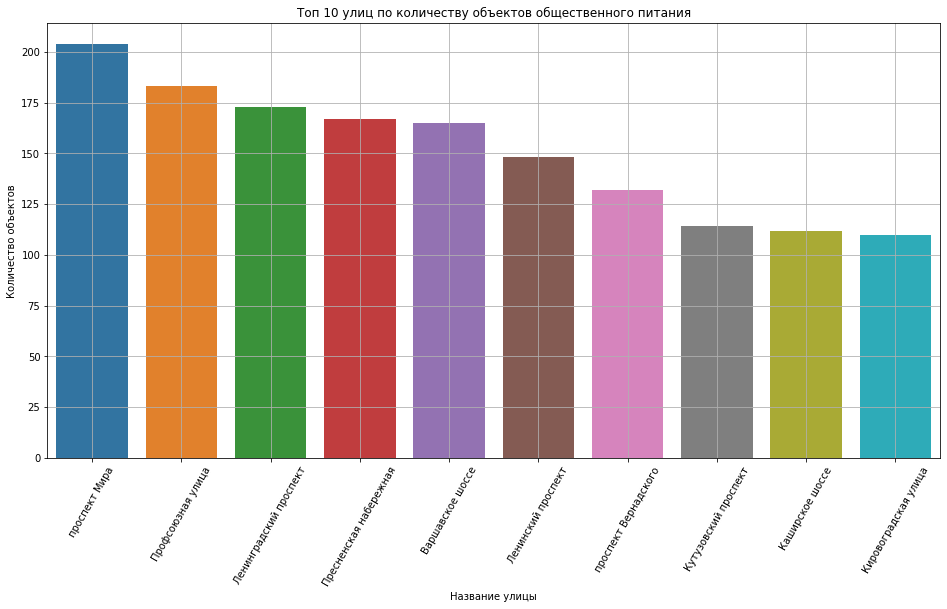

In [65]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x = 'street', y ='id',data = top_street.head(10))
ax.set(title='Топ 10 улиц по количеству объектов общественного питания', xlabel='Название улицы', ylabel='Количество объектов')
plt.grid()
plt.xticks(rotation=60);

Больше всего заведений находится на улице **Проспект Мира**, которая проходит через такие районы как **Мещанский район, Алексеевский район, район Марьина Роща, Останкинский район, район Ростокино, район Свиблово, Ярославский район.**

И в целом прочти для всех топ 10 улиц характерно то, что они проходят более чем через 1 район.

# 2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы? <a id="step2_8"></a>

In [66]:
# возьмем таблицу из предыдущего пункта сгруппируем по районам и выведим топ10, в которых есть улицы с 1 заведением
(top_street.query('id == 1').groupby(['district'],as_index=False).agg({'id':'count'})
         .sort_values(by='id',ascending=False).head(10))

,district,id
36,Таганский район,25
3,Басманный район,23
141,район Хамовники,21
38,Тверской район,19
100,район Марьина Роща,16
131,район Сокольники,15
32,Пресненский район,15
19,Мещанский район,12
76,район Замоскворечье,12
94,район Лефортово,11


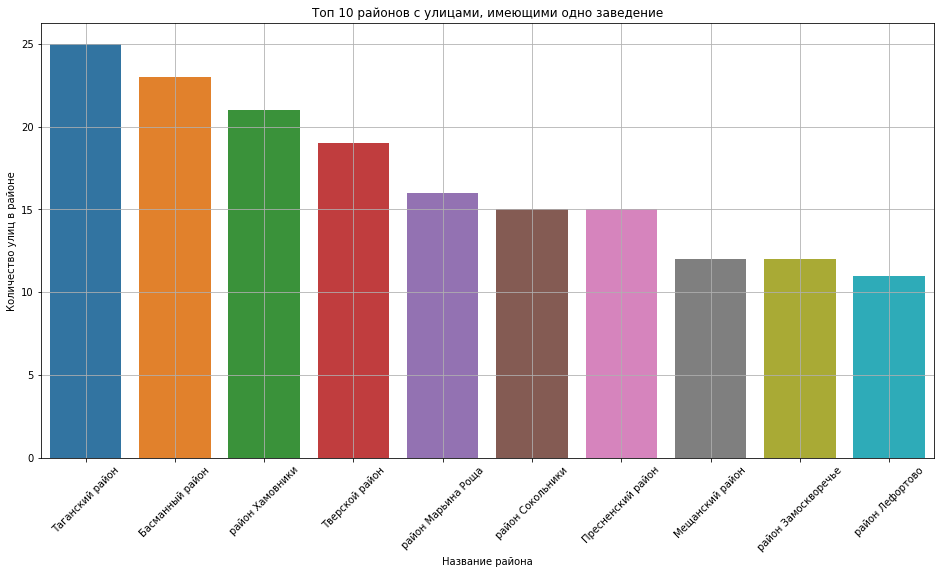

In [67]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x = 'district', y ='id',data = (top_street.query('id == 1')
                                                 .groupby(['district'],as_index=False).agg({'id':'count'})
                                                 .sort_values(by='id',ascending=False).head(10)))
ax.set(title='Топ 10 районов с улицами, имеющими одно заведение', xlabel='Название района', ylabel='Количество улиц в районе')
plt.grid()
plt.xticks(rotation=45);

In [68]:
print('Всего есть {} улиц, на которых всего 1 заведение'.format(len(top_street.query('id == 1'))))

Всего есть 670 улиц, на которых всего 1 заведение


И больше всего таких улиц в **Тагансокм, Басманном и районе Хамовники**

# 2.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить? <a id="step2_9"></a>

In [69]:
top10_list = top_street['street'].head(10).to_list()

In [70]:
top10_df = final_df.query('street == @top10_list')

In [71]:
top10_df

,id,object_name,chain,object_type,address,number,street,district
151,155973,кафе «андерсон»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
152,23618,кафе «subway»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
153,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
154,152556,шаурма в пите,несетевое,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
155,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,"Донской район, район Нагатино-Садовники, Нагорный район, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Север..."
...,...,...,...,...,...,...,...,...
15308,213629,додо пицца,сетевое,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная,Пресненский район
15325,198436,милти,сетевое,фаст-фуд,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,Ленинградский проспект,"район Аэропорт, район Беговой, район Сокол, Хорошёвский район"
15347,222491,кальянная «мята lounge»,сетевое,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,Профсоюзная улица,"Академический район, район Коньково, Обручевский район, район Тёплый Стан, район Черёмушки, район Ясенево"
15350,213061,мята,сетевое,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе,"район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное"


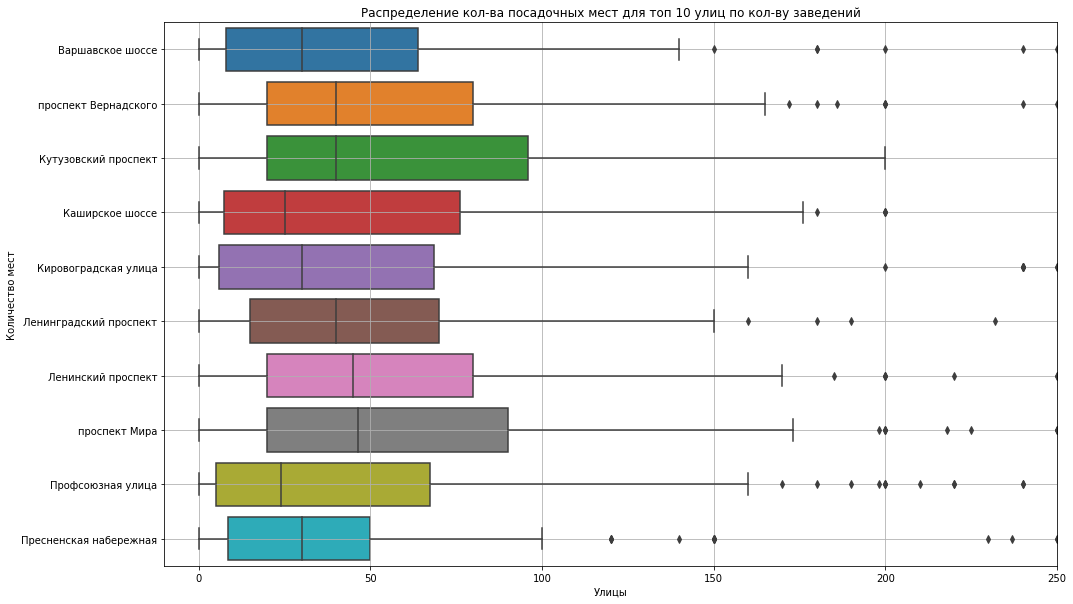

In [72]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x='number', y='street', data = top10_df)
ax.set(title='Распределение кол-ва посадочных мест для топ 10 улиц по кол-ву заведений',xlabel='Улицы',ylabel='Количество мест')
plt.grid()
plt.xlim(-10, 250);

Ни в одном заведении медианное значение количества посадочных мест не превышает 50. Возможно что из-за большого количетсва заведений у них маленький метраж, так же может быть дорогая аренда, ведь улицы довольно известные.

# 2.10  Общий вывод.<a id="step2_10"></a>

**Мы провели большой и последовательный анализ:**
* Провели предобработку данных, исследовали отношение видов объектов общественного питания и соотношение сетевых и несетевых заведений по количеству, построили графики.
* Выяснили что сетевое распространение характерно для предприятий быстрого обслуживания и магазинов с отделом кулинарии.
* Так же определили, что для сетевых заведений характерно много заведений с малым количеством мест а самое большое среднее количетсво посадочных мест характерно для столовых и ресторанов и так же для наглядного представления изобразили все это на графиках.
* Мы выяснили что больше всего заведний находится на таких улицах как: проспект Мира, Профсоюзная улица и Ленинградский проспект, и проходят эти улицы сразу через несколько районов Москвы, а количство посадочных мест в заведениях на этих улицах практически не преышает отметку в 100 мест.
* Определили, что большинство улиц с одним заведением распологается в центральной части города, и так же сделали предположение причины такого распределения.

**А отвечая на поставленную задачу, можно сказать слудующее:**

Изначально мы выбрали, что заведение должно быть кафе, это правилный выбор, и само собой оно будет у нас несетевое. Количество  посадочных мест можно взять равное 50, редко когда кафе превышают это значение. И лучше всего для нашего кафе выбрать одну из топ 10 улиц по количеству заведений, так как мало того что улицы сами по себе популярны, так еще и наше кафе весьма оригинальное, поэтому скорее всего при большом выборе посетители будут делать выбор именно в пользу нашего кафе.

# Презентация

https://docs.google.com/presentation/d/1SnkW0sncfXuT-DTwwblhq12m3IjNLHGpdXNrZ5nBP-I/edit?usp=sharing